# Learning spatial (road) network analysis
Useful links: 
* Notebook - [retrieving open streetmap data](https://autogis-site.readthedocs.io/en/latest/notebooks/L6/00_retrieve_osm_data.html)
* Notebook - [spatial network analysis](https://sustainability-gis.readthedocs.io/en/latest/lessons/L2/spatial_network_analysis.html)
* Presentation - [spatial network analysis presentation](https://autogis-site.readthedocs.io/en/latest/notebooks/L6/00_retrieve_osm_data.html)
* Notebook - [facility location with spaghetti](https://pysal.org/spaghetti/notebooks/facility-location.html)
* Article - [OSMnx: Python for Street Networks](https://geoffboeing.com/2016/11/osmnx-python-street-networks/)
* Article - [Simplifying road networks with OSMnx](https://geoffboeing.com/2020/06/whats-new-with-osmnx/)
* Tool - [OSM-Routing: for simplifying road networks (geoFluxus)](https://github.com/geoFluxus/OSM-Routing)

In [83]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt

In [50]:
roads = pd.read_csv('data/noord-holland.osm-simplified.csv', sep=';') # created using osm-routing tool from geofluxus
roads['geometry'] = gpd.GeoSeries.from_wkt(roads.wkt)
roads = gpd.GeoDataFrame(roads)
roads = roads.set_crs(4326)
roads = roads.to_crs('EPSG:28992')
roads['length'] = roads.geometry.length
roads.head()

,wkt,geometry,length
0,"LINESTRING(5.4119803 52.6366882,5.35873 52.675...","LINESTRING (156677.132 516576.429, 153074.056 ...",9949.020544
1,"LINESTRING(5.032465116666667 52.927965175,5.01...","LINESTRING (131145.157 549046.721, 130230.310 ...",7203.898499
2,"LINESTRING(5.032465116666667 52.927965175,5.03...","LINESTRING (131145.157 549046.721, 131570.759 ...",15302.923869
3,"LINESTRING(5.032465116666667 52.927965175,5.01...","LINESTRING (131145.157 549046.721, 130122.468 ...",9518.874990
4,LINESTRING(4.938327842857142 52.89785164285713...,"LINESTRING (124794.046 545730.974, 124747.405 ...",9845.203806


<AxesSubplot:>

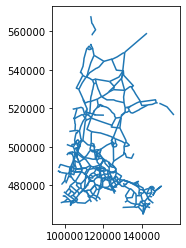

In [51]:
roads.plot()

In [52]:
roads.to_file('data/roads_simplified.shp')

C:\Users\tpytsui\Miniconda\envs\geo_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


below: see https://gis.stackexchange.com/questions/239633/how-to-convert-a-shapefile-into-a-graph-in-which-use-dijkstra

In [73]:
from shapely.ops import unary_union
import itertools
res = unary_union(list(roads.geometry))
G = nx.Graph()
for line in res:
    for seg_start, seg_end in zip(list(line.coords),list(line.coords)[1:]):
        G.add_edge(seg_start, seg_end) 
G.graph['crs'] = 'EPSG:28992'

C:\Users\tpytsui\AppData\Local\Temp\ipykernel_15940\1221208157.py:5: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in res:


In [82]:
nx.write_shp(G, outdir='data/nxWriteShp')
edges = gpd.read_file('data/nxWriteShp/edges.shp')
nodes = gpd.read_file('data/nxWriteShp/nodes.shp')

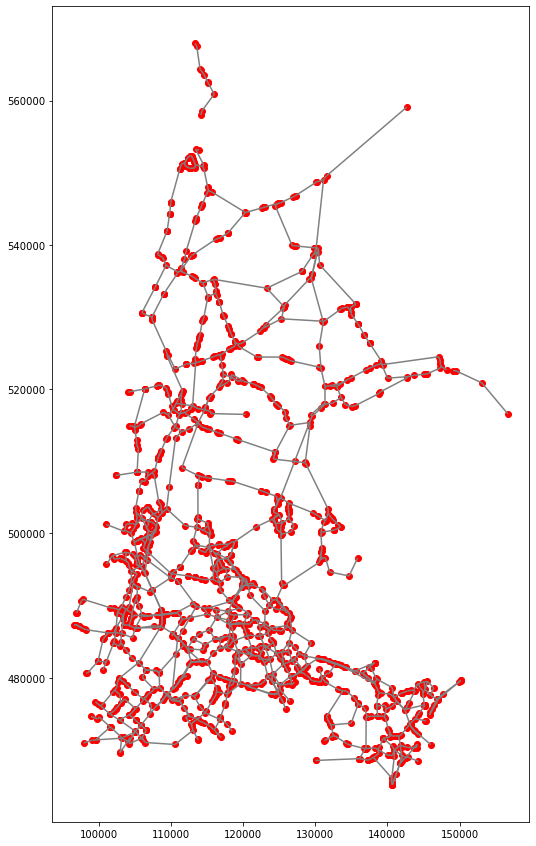

In [84]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
edges.plot(ax=ax, color='grey')
nodes.plot(ax=ax, color='red')
plt.show()

In [87]:
nodes

,FID,geometry
0,0,POINT (156677.132 516576.429)
1,1,POINT (153074.056 520865.256)
2,2,POINT (149512.294 522537.607)
3,3,POINT (149102.007 522582.560)
4,4,POINT (131145.157 549046.721)
...,...,...
1439,1439,POINT (96578.118 487366.940)
1440,1440,POINT (96839.606 487355.591)
1441,1441,POINT (97236.002 487151.463)
1442,1442,POINT (97246.228 487144.345)


In [86]:
G2 = ox.graph_from_gdfs(nodes, edges)

ValueError: gdf_nodes must contain x and y columns